### Acessando Computadores Quânticos Reais da IBM

<p>Nesta aula iremos entender como acessar os dispositivos quânticos reais que a IBM disponibiliza de forma gratuíta. Para isso vamos executar um experimento de uma implementação da <b>Transformada Quântica de Fourier</b> em um dispositivo quântico real.

<p> Nesta aula estaremos aptos à: </p>
<ul>
<li> Acessar os computadores quânticos da IBM;</li>
<li> Compilar circuitos quânticos nos dispositivos quânticos Reais;</li>
<li> Notar algumas diferenças de utilizar dispositivos quânticos reais e os simuladores quânticos do qiskit. </li>
</ul>

De acordo com o *Manual de Acesso à plataforma IBMQ* a primeira coisa que faremos é criar uma conta clicando aqui:  <a href = "https://quantum-computing.ibm.com/"> Sign in to IBM Quantum </a> e aparecerá a imagem da Figura abaixo.

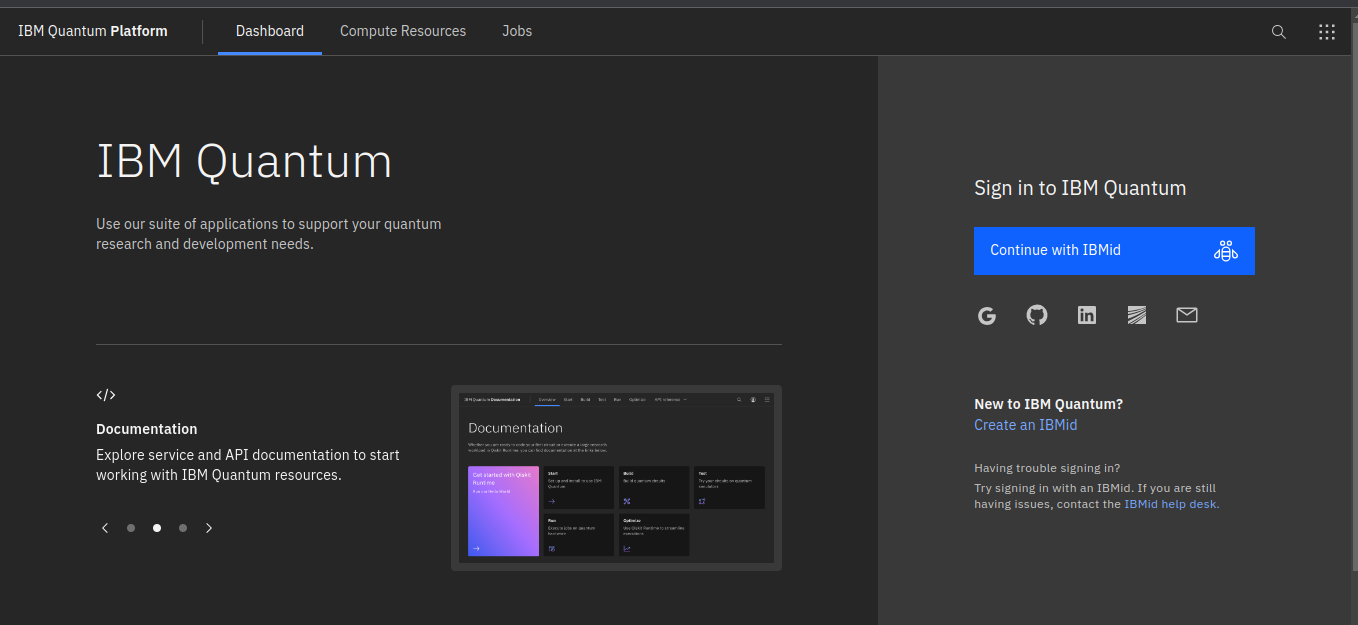

<p> Existem formas distintas de cadastro para acessar a IBM-Q. Escolha a de sua preferência. Após o cadastro, a página principal da plataforma é mostrada na Figura abaixo.</p>

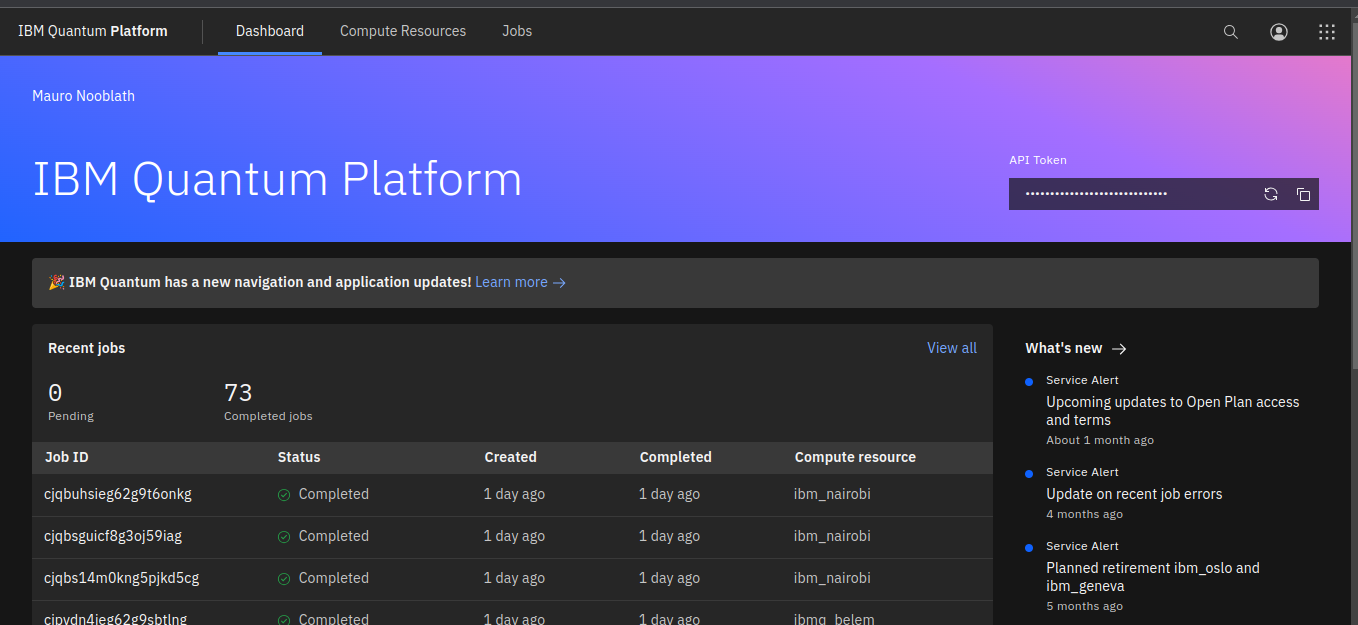

================================================================================================================================================================================================================

Observe que existe na parte superior da Figura à direita escrito **API Token**. Isso é fundamental para conectarmos na nuvem da *IBM Quantum Experience*. Como veremos nas próximas linhas de código. 

A ideia desta aula é *acessar e executar algoritmos quânticos nesses dispositivos reais e comparar os resultados da execução com um simulador*.

Como uma motivação, iremos executar um circuito de emaranhamento em ambos os ambientes computacionais e observar algumas diferenças nos resultados de execução.


In [1]:
# Importando as bibliotecas que serão úteis para essa aula e definindo o simulador que iremos utilizar do qiskit
from qiskit import* 
from qiskit.circuit import*
from qiskit.visualization import*
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info import*
import numpy as np


#Definindo o Simulador Quântico
sim_Aer = Aer.get_backend("aer_simulator") 


Vamos criar um circuito quântico que representa um estado de Bell que é um exemplo de estado emaranhado.

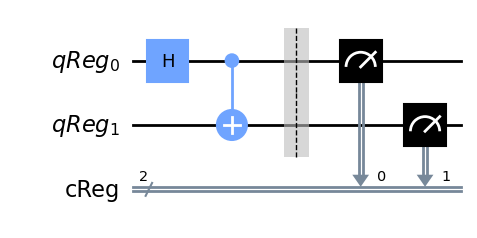

<IPython.core.display.Latex object>

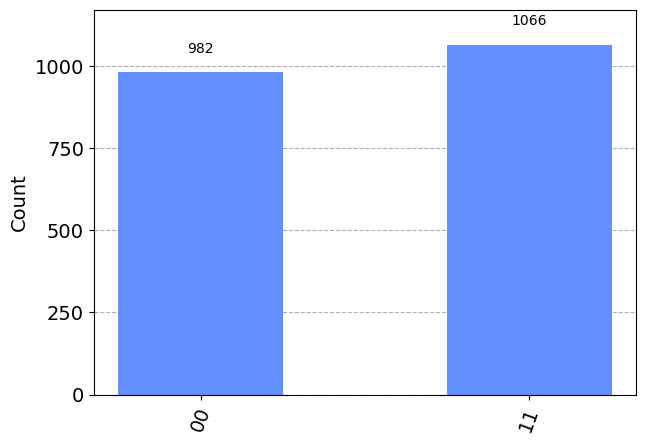

In [5]:
nqBits = ncBits = 2 # Define a quantidade de QuBits
 
qRegs = QuantumRegister(nqBits, 'qReg') # Define a quantidade de registradores Quânticos
cRegs = ClassicalRegister(ncBits, 'cReg') # Define a quantidade de registradores clássicos
qc = QuantumCircuit(qRegs, cRegs) # Gera o circuito quântico 

qc.h(qRegs[0]) # Superpõe o qubit mais a direita
qc.cnot(qRegs[0],qRegs[1]) # Conecta o qubit mais à direita com o qubit mais a esquerda gerando um estado emaranhado 

qc_state = qc.copy() 
qc_counts = qc.copy()

qc_state.save_statevector() # Salva o vetor de etado

state = execute(qc_state,sim_Aer).result().get_statevector() # Gera o vetor de estado representado no circuito quântico
state = Statevector(state).draw("latex", prefix = "\\text{Bell State --> $|\psi\\rangle = $}")

qc_counts.barrier() 
qc_counts.measure(qRegs[0],cRegs[0])  # Prepara uma medida no qubit 0 e armazena no bit clássico 0
qc_counts.measure(qRegs[1],cRegs[1])  # Prepara uma medida no qubit 1 e armazena no bit clássico 1

counts = execute(qc_counts,sim_Aer,shots = 2048).result().get_counts() # Efetua a medida

display(qc_counts.draw('mpl')) # Mostra o circuito na tela
display(state) # Mostra o estado na tela 
display(plot_histogram(counts)) # Mostra o histograma das medidas na tela


Agora vamos conectar na plataforma da IBMQ para acessar um dispositivo quântico real. Para isso vamos executar os códigos abaixo. Observem que a chave **API token** mostrada no começo deste tutorial será usada aqui para conectar ao IBM Quantum Experience.

In [2]:
API_token = "95c01ed02ceb6c7d4d1656bcd7022bb06613d5fbd73ec3865e4c2c429824f925b43f9e0c7013d1e005d671e0b4ad58fac51a8303721fed88285f1ea3c0dce5a6"
IBMQ.save_account(API_token, overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')


/tmp/ipykernel_13505/3604686189.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(API_token, overwrite=True)


<p>Após conectado na plataforma da IBMQ atraveś do token disponível na "IBM Quantum Platform" iremos escolher o dispositivo que vamos executar o nosso algoritmo através da função "least_busy". Essa função é importante, pois para executar os códigos em sistemas grátis da plataforma precisamos entrar em uma fila de execução. Portanto, essa função retorna o dispositivo que está menos ocupado (ou com a fila mais curta) a partir das características que especificamos.</p>



A função "least_busy" possui como argumento uma **lista de dispositivos da IBMQ** que pode ser adquirida usando o método "provider.backends". Perceba que "provider" foi uma variável definida na célula anterior.

In [3]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

Importante notar que já estamos conectados a plataforma da IBMQ. Agora, vamos criar um filtro entre esses backends para procurar aquele que seja adequado ao nosso experimento.
Neste caso, queremos que o backend tenha a quantidade de qubits **maior ou igual** ao que foi definido na variável **nqBits**, não queremos que seja simulador e queremos que esteja em operação, ou seja, esteja em funcionamento. Para isso observe o código abaixo.

In [8]:
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= nqBits 
                  and not x.configuration().simulator
                  and x.status().operational == True))


print("O backend menos ocupado é: ", backend)

O backend menos ocupado é:  ibm_lagos


Neste caso o **ibmq_jakarta** é o dispositivo menos ocupado, portanto vamos executar o nosso circuito neste backend **ibm_jakarta**. Para isso precisamos transpilar o nosso circuito para as portas nativas deste dispositivo. Esse é um processo automático que é realizado através da função **transpile** do próprio qiskit. Mas para sanar curiosidades, vamos ver a configuração deste dispositivo para sabermos quais são as portas nativas dele 

Para isso, clique em **Compute Resources** na aba superior da tela principal da plataforma da IBMQ, como mostrado na Figura abaixo.



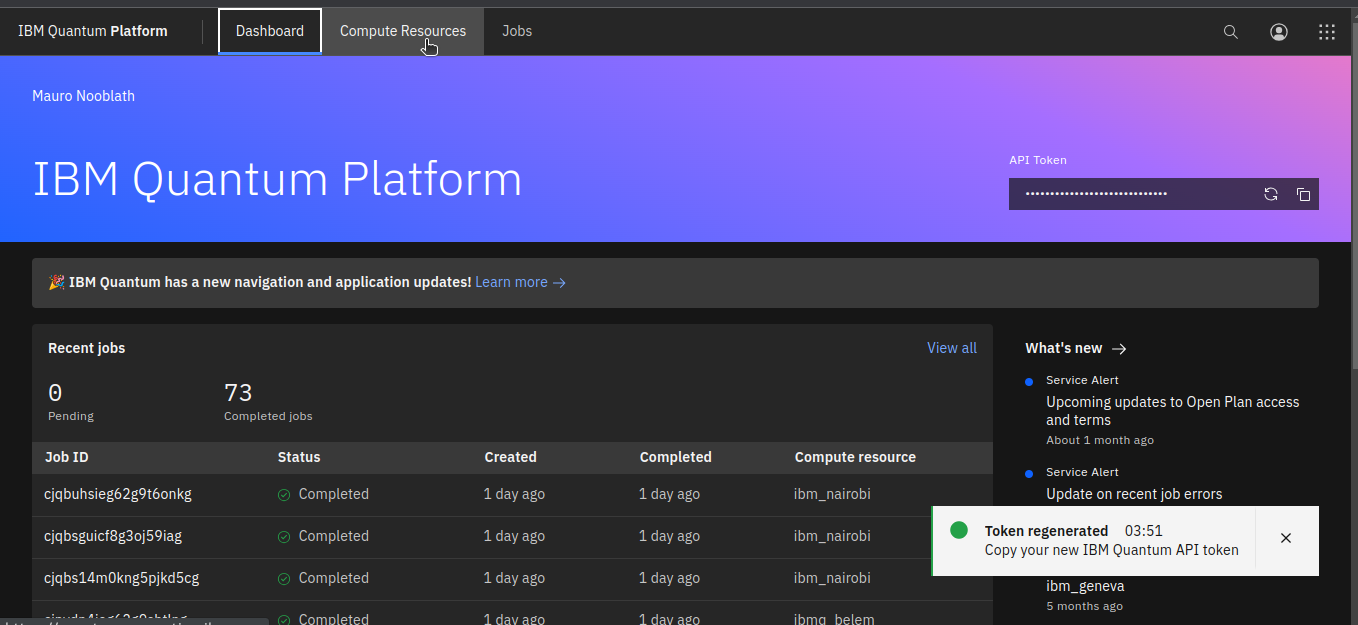

<p>Ao clicar, aparecerão vários backends (dispositivos) da IBM. Como mostra a imagem abaixo.

![alt text](computer_resources.png)

Observe que o **ibm_jakarta** possui 7 qubits, o tipo de processador, o quantum volume que é um método para quantificar o poder computacional de um dispositivo quântico, que neste caso, é 32. Ao clicar nele, vemos mais configurações. Como as portas básicas deste sistema que é a Not controlada, Identidade, Rotação Z, SX e Not

![alt text](jakarta.png)

<p> Na célula abaixo foi executado o circuito antes de ser transpilado e após ser transpilado para o dispositivo "ibm_jakarta"</p>

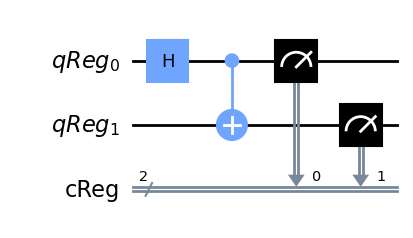

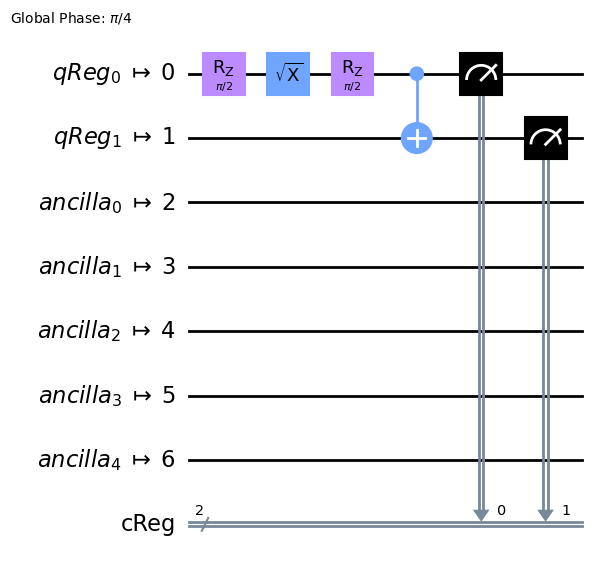

In [9]:
qc.measure(qRegs[0],cRegs[0])
qc.measure(qRegs[1],cRegs[1])
display(qc.draw('mpl'))
transpiled_qc = transpile(qc, backend, optimization_level = 1)
display(transpiled_qc.draw('mpl'))

<p>Finalmente vamos executar o  circuito neste dispositivo! </p>

In [36]:
job = backend.run(transpiled_qc, shots = 2048)
job_monitor(job)

Job Status: job is queued (None)

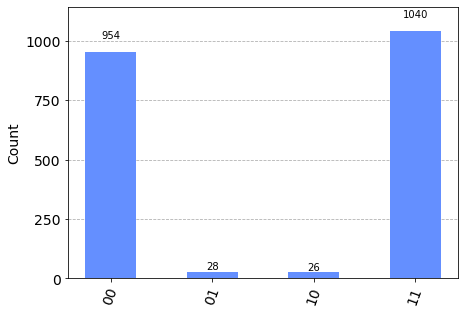

In [ ]:
counts = job.result().get_counts()
plot_histogram(counts)

Observe que ao executar o experimento em um dispositivo quântico real existem ruídos associados às medidas que foram feitas. O aparecimento de estados como **01** e **10** surgiu devido à estes ruídos. Idealmente, o **simulador** mostrou somente os estados que deveriam aparecer, **00** e **11**.

================================================================================================================================================================================================================================================


#### Dado este procedimento, vamos executar um experimento um pouco mais robusto que é o algoritmo da Transformada de Fourier Quântica (QFT).









Nesta aula, revisaremos somente a ideia do algoritmo, pois já foi visto na aula teórica e será visto na próxima aula prática mais detalhes sobre o assunto. Para isso observe esta contagem de 4 bits no eixo $Z$ representada na animação abaixo.



![alt text](zbasis-counting.gif)

A frequência com que o Qubit 0 varia é de $2^0$ incrementos. A frequência com que o Qubit 1 varia é de $2^1$ incrementos. A frequência com que o o Qubit 2 varia é $2^2$ incrementos. E assim por diante. Agora ao aplicar o operador $QFT$ os estados representados a cada incremento ficam em uma outra base que é a base de Fourier.

![alt text](fourierbasis-counting.gif)

Cada número é representado por um ângulo. Este ângulo é o ângulo assumido por cada qubit ao girar em torno do eixo $Z$.
Observe que para representar, por exemplo, o número $|\tilde{4}\rangle$, giramos o qubit mais a esquerda em $\frac{4}{2^n}$ voltas completas. No caso, fazendo $n = 4$, pois são 4 Qubits teremos  $$\frac{4}{16} \text{Voltas completas do qubit mais a esquerda}$$ que em radianos resulta em $\frac{4}{16} * 2\pi  \text{ rad}$. Para descobrir o ângulo do segundo qubit mais a esquerda é só multiplicar por 2 que no caso seria em radianos $\frac{8}{16} * 2\pi$ voltas e assim por diante.

<font color="red"> ATENÇÃO: Usamos o n para designar que utilizamos 4 qubits para representar qualquer número, não confundior com o número 4 que é  que queremos transpor para a base de Fourier</font>

<font color="red"> ATENÇÃO: Girar em torno da Base Z é diferente de estar na Base Z. Observe que no primeiro caso estávamos na Base Z. Agora estamos na base de Fourier girando em torno do eixo Z </font>

===================================================================================================================================================================================================================================

Uma vez abordada tal ideia, implementaremos o operador quântico $QFT$ que é o responsável por fazer tal transformação. 
Ou seja $$QFT |\psi\rangle = |\tilde{\psi}\rangle$$ QFT será implementado para $|\psi\rangle = 4$ utilizando 3 qubits.
O circuito que representa o vetor de estado 4 é mostrado abaixo. Lembrando que temos que transformar 4 para número binário que seria "100".




4 em binário 0b100


None

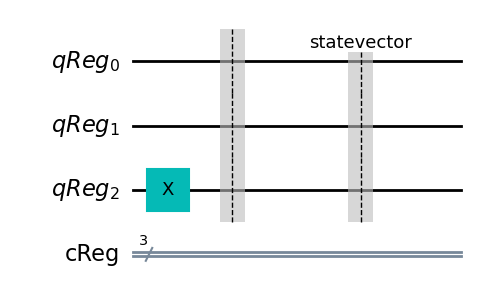

<IPython.core.display.Latex object>

In [73]:
nqBits = ncBits = 3
qRegs = QuantumRegister(nqBits,'qReg')
cRegs = ClassicalRegister(ncBits, 'cReg')

qc_4 = QuantumCircuit(qRegs,cRegs)
qc_4.x(qRegs[2])

qc_4.barrier()

qc_4_state = qc_4.copy()
qc_4_state.save_statevector()
state = execute(qc_4_state,sim_Aer).result().get_statevector()


display(print("4 em binário", bin(4)))
display(qc_4_state.draw('mpl'))
display(Statevector(state).draw('latex',prefix = "\\text{$|\psi\\rangle = $}"))


Lembrando que no qiskit o Qubit mais abaixo é o Qubit mais à esquerda. 

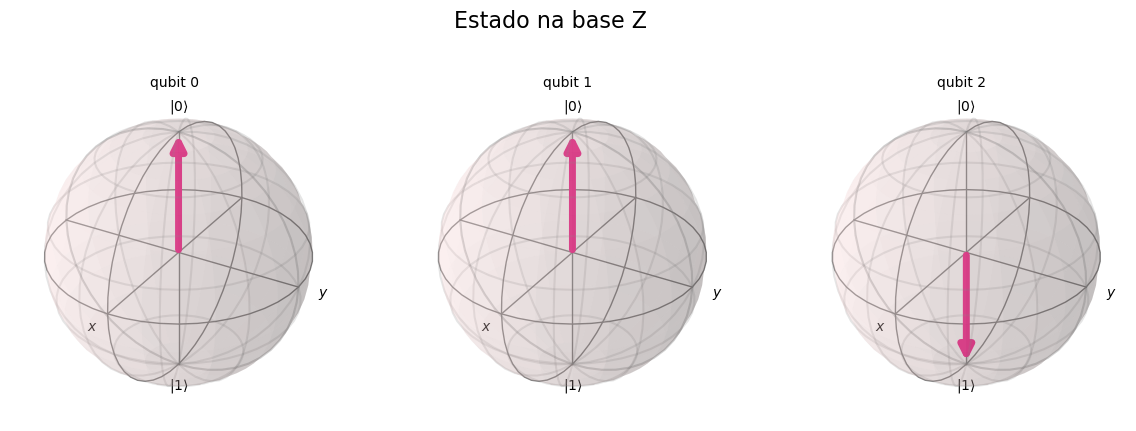

In [74]:
plot_bloch_multivector(state, 'Estado na base Z')

Agora vamos implementar o operador para ver como é este estado na base de Fourier. Vamos começar com o qubit mais a esquerda.

Precisamos mudar sua base para a base $X$ aplicando a operação Hadamard.

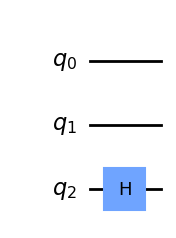

In [75]:
qft_circuit = QuantumCircuit(nqBits)
qft_circuit.h(2) #Aplica-se a Hadamard
qft_circuit.draw('mpl')

Neste exemplo de implementação $n = 3$ qubits ao invés de $n = 4$, portanto matematicamente ficaria da seguinte forma. 

$$\text{Em relação ao qubit 2} = \frac{4}{8} * 2\pi =  4* \frac{\pi}{4}. \text{ Ou seja quando o Qubit 2 estiver no estado} |1\rangle, \text{acrescentaremos uma fase de } \frac{\pi}{4} \text{no estado do Qubit 0.} $$ 
$$\text{E em relação ao Qubit 1, quando o qubit 2 estiver no estado} |1\rangle \text{ acrescentaremos uma fase de} \frac{\pi}{2} \text{ no Qubit 1 }$$
Isso pode ser feito utilizando a porta de fase controlada $Control-P$.

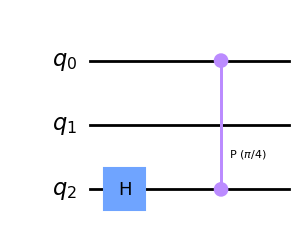

In [76]:
qft_circuit.cp(theta = np.pi/4, control_qubit = 2, target_qubit=0)

display(qft_circuit.draw('mpl'))

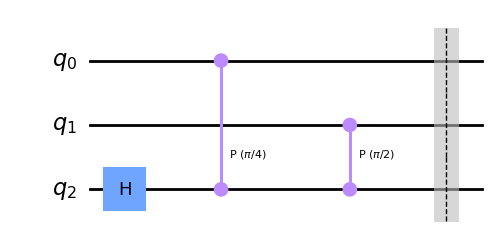

In [77]:
qft_circuit.cp(theta= np.pi/2, control_qubit = 2, target_qubit = 1)

qft_circuit.barrier()

display(qft_circuit.draw('mpl'))

A primeira camada do operador QFT foi implementada, a segunda camada segue a mesma ideia, só que dessa vez em relação ao qubit 1 e 0, e depois somente o qubit 0. Então fica

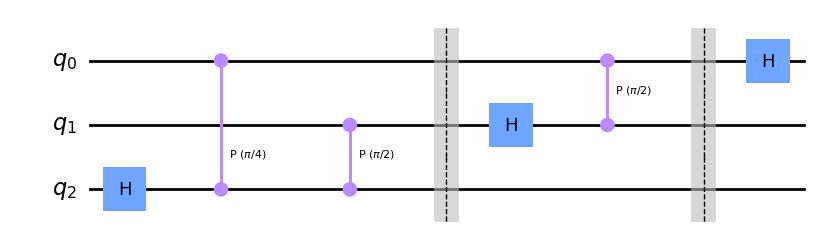

In [78]:
qft_circuit.h(1)
qft_circuit.cp(theta = np.pi/2, control_qubit = 1, target_qubit = 0)

qft_circuit.barrier()

qft_circuit.h(0)



display(qft_circuit.draw('mpl'))

Adicionando a SWAP para trocar o qubit 2 com o qubit 0 para facilitar a visualização teremos

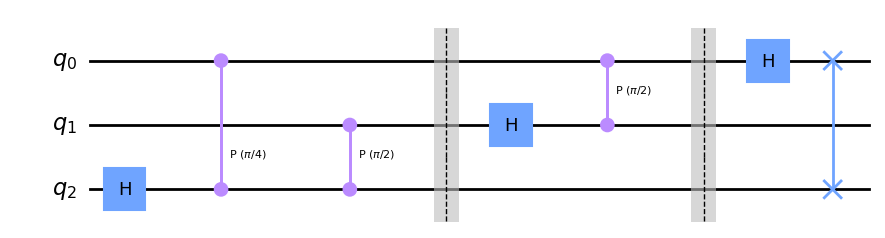

In [79]:
qft_circuit.swap(0,2)
display(qft_circuit.draw('mpl'))

Este é o operador QFT que precisamos aplicar no estado acima implementado que representa o número 4 na base Z

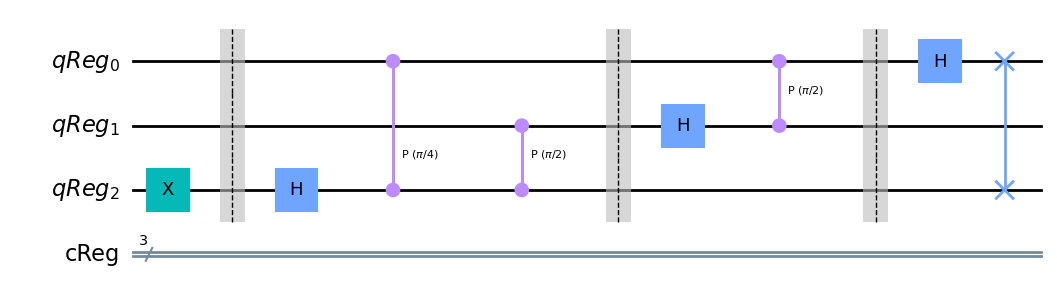

In [80]:
qc_4fourier = qc_4.compose(qft_circuit)
qc_4fourier.draw('mpl')

Vamos visualizar o 4 na base de Fourier

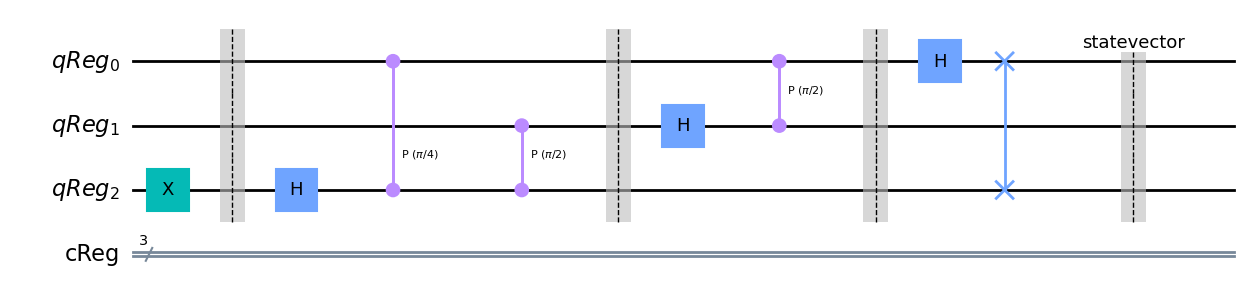

In [81]:
qc_4fourier.save_statevector()
qc_4fourier.draw('mpl')


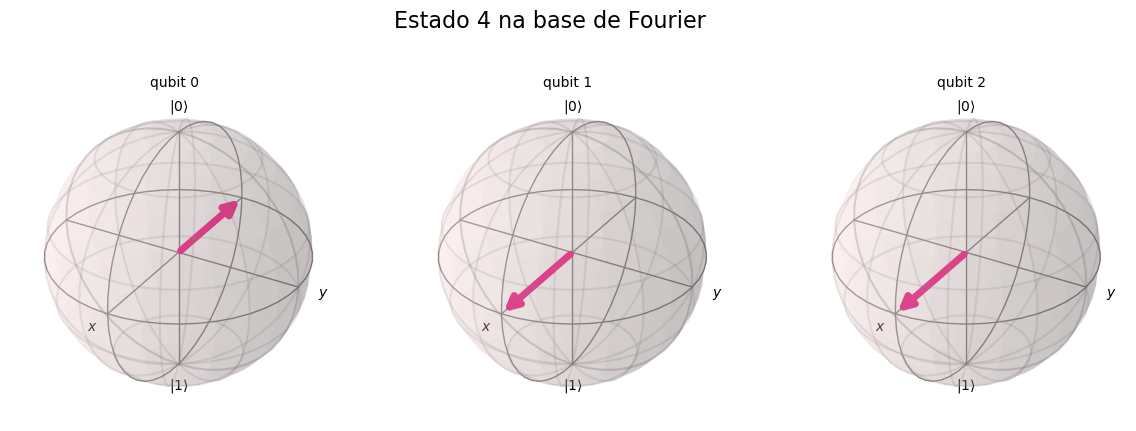

In [82]:
state_4fourier = execute(qc_4fourier,sim_Aer).result().get_statevector()
plot_bloch_multivector(state_4fourier, "Estado 4 na base de Fourier")

Agora, dado o estado na base de Fourier vamos verificar se realmente é o estado na base Z. 

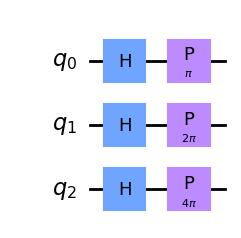

In [83]:
qc_4fourier = QuantumCircuit(nqBits)
qc_4fourier.h(range(3))

qc_4fourier.p(4/2**3 * 2 *np.pi, 0)
qc_4fourier.p(8/2**3 * 2 *np.pi,1)
qc_4fourier.p(16/2**3 * 2 *np.pi,2)

qc_4fourier.draw('mpl')

Tais ângulos são os angulos achados aplicando as relações discutidas acima. Perceba que aplica-se a Hadamard para transpor o estado para a base X

Após isso aplicamos o operador no formato inverso 

In [84]:
qft_inverse = qft_circuit.inverse()


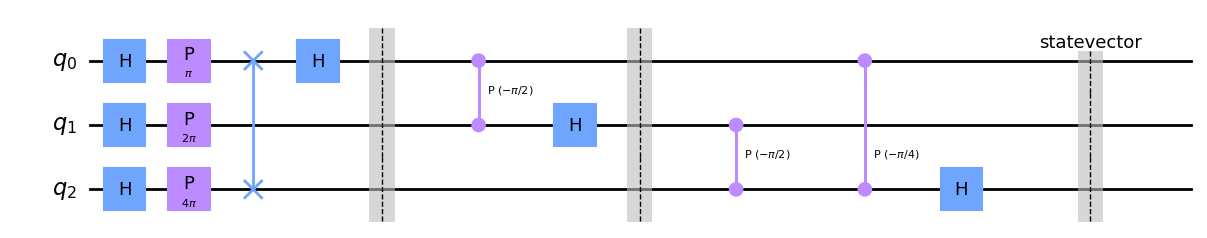

In [85]:

inverse_fourier = qc_4fourier.compose(qft_inverse)

inverse_fourier.save_statevector()

inverse_fourier.draw('mpl')

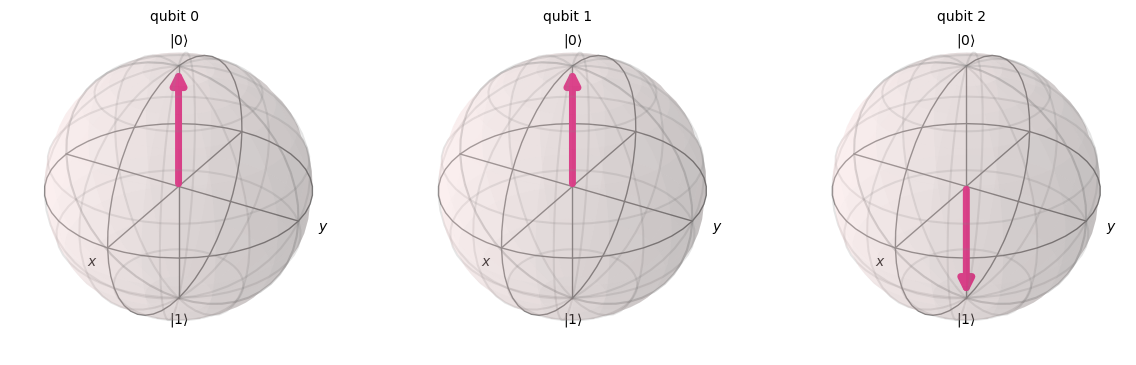

In [86]:
plot_bloch_multivector(execute(inverse_fourier,sim_Aer).result().get_statevector())

Vamos executar isso num computador quântico real

In [87]:
def qft_circuit(qubits):
    
    n = qubits
    qc = QuantumCircuit(n)

    from itertools import combinations
    lista = list(range(n))
    comb = list(combinations(sorted(lista,reverse=True),2))


    for i in range(len(comb)):
        if comb[i][0] - comb[i][1] == 1:
            qc.h(comb[i][0])
        
        qc.cp(theta = np.pi/2**(-comb[i][1] + comb[i][0]), control_qubit = comb[i][1], target_qubit= comb[i][0])
        
        if i == len(comb)-1:
            qc.h(comb[i][1])
        
        qc.barrier()
    
    qc.swap(0,2)

    qc.draw('mpl')
        
    return qc

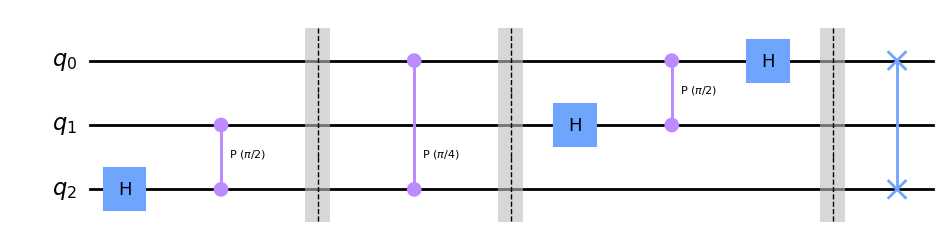

In [88]:
qft_circuit(3).draw('mpl')

Esta função acima fornece o operador de fourier a partir da quantidade de Qubits fornecida. Usando 3 qubits temos:

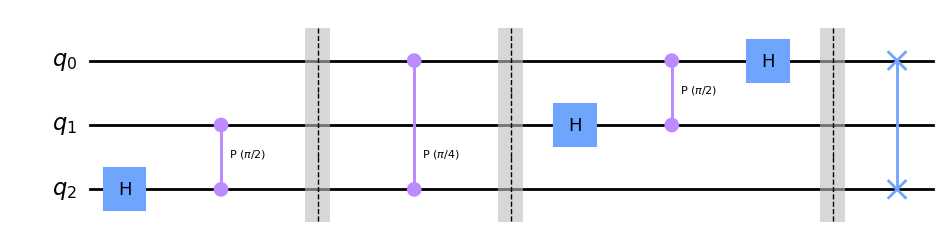

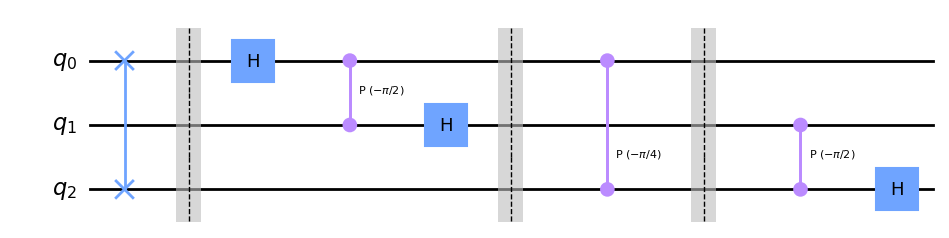

In [92]:
nqBits = 3

qft3_circuit = qft_circuit(nqBits)
display(qft3_circuit.draw('mpl'))
qft_inverse = qft3_circuit.inverse()
display(qft_inverse.draw('mpl'))




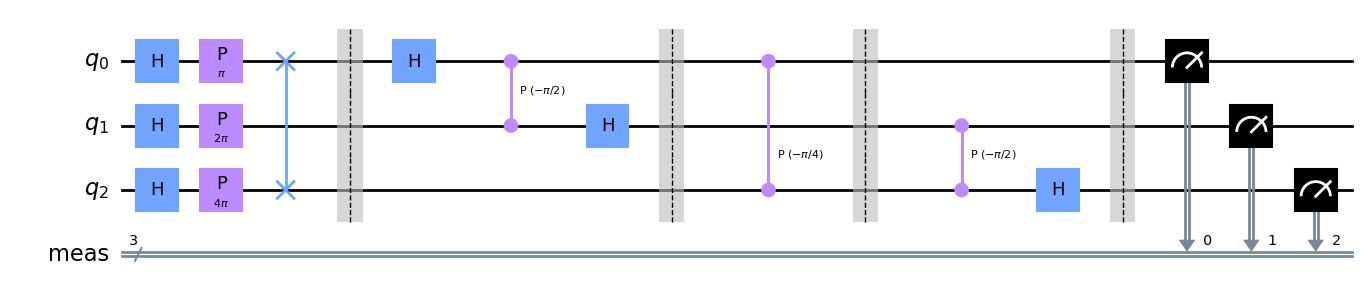

In [93]:
inverse_fourier = qc_4fourier.compose(qft_inverse)

inverse_fourier.measure_all()
inverse_fourier.draw('mpl')


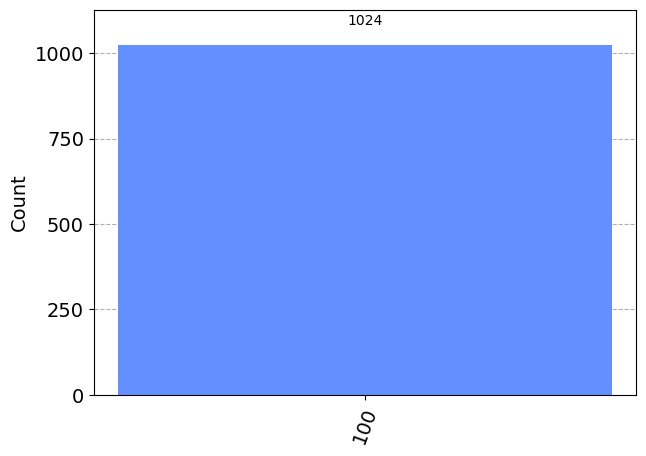

In [94]:
counts = execute(inverse_fourier, sim_Aer).result().get_counts()
plot_histogram(counts)

Agora, vamos ver qual dispositivo iremos utilizar usando as funções comentadas acima

In [95]:
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= nqBits 
                  and not x.configuration().simulator
                  and x.status().operational == True ))

print("O backend menos ocupado é: ", backend)

O backend menos ocupado é:  ibm_perth


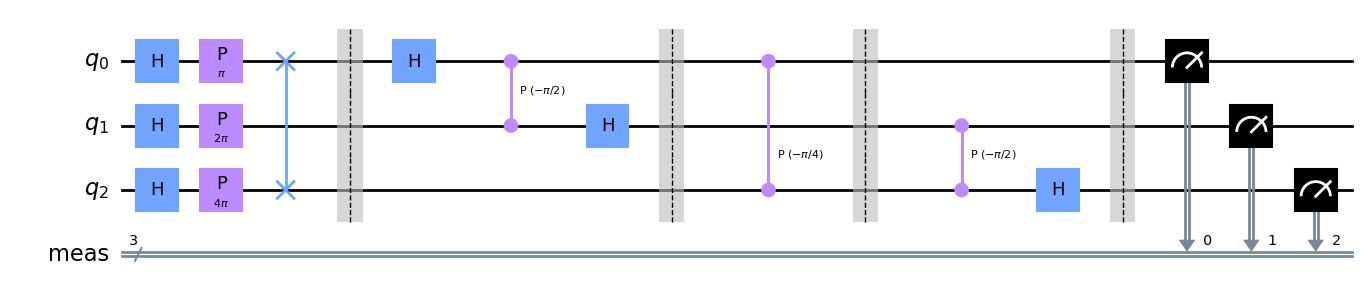

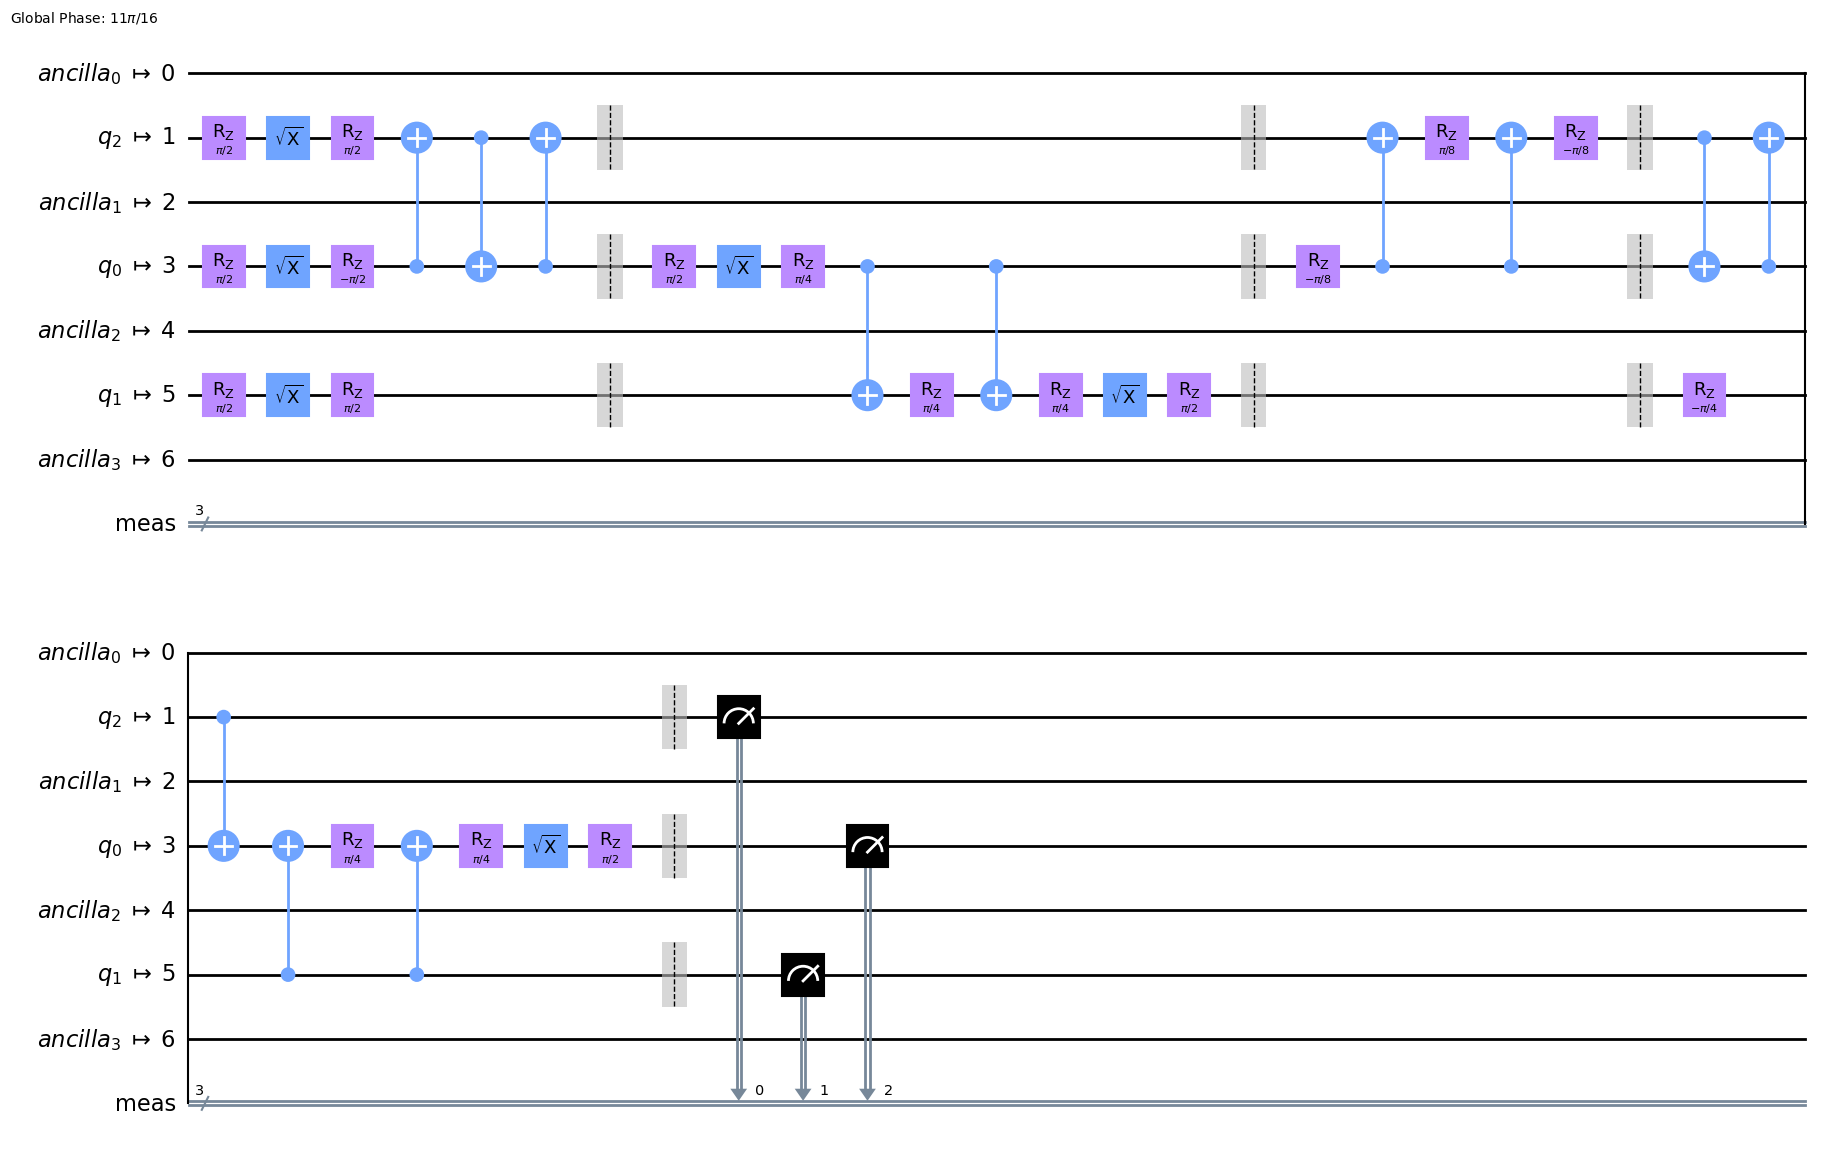

In [96]:
display(inverse_fourier.draw('mpl'))
transpiled_qc = transpile(inverse_fourier, backend, optimization_level = 1)
display(transpiled_qc.draw('mpl'))

In [97]:
job = backend.run(transpiled_qc, shots = 2048)
job_monitor(job)


Job Status: job is queued (None)

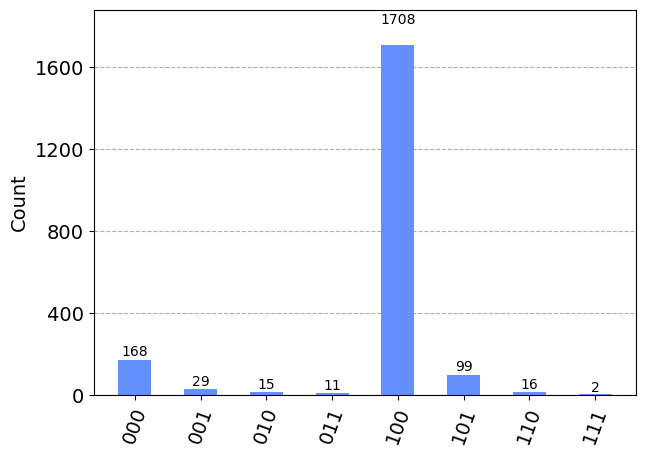

In [280]:
plot_histogram(job.result().get_counts())